In [1]:
import sys
sys.path.append("../")
from ortho_lib3 import *
from ortho_plot import *
from scipy.stats import entropy
from scipy.signal import correlate2d
import pandas as pd
from scipy.spatial.transform import Rotation as R
import math

In [2]:
def get_exercises_from_patients(patients, exercise):
    exercises = {}
    
    for p in patients:
        ex = files_category.get_exercises(p, ex_type=exercise)
        ex1 = ex[0]
        exercises[p] = ex1

    return exercises

In [3]:
def get_dfs_dict_rotation(category, exercises):
    dfs_dict = {}

    for patient, exercise in exercises.items():
        path = category.fullpath(pat_id = patient, exercise = exercise)
        rotation_df = exercise_to_df_with_rotation(path).reset_index(drop=True)
        if rotation_df['frame'].max() > 200:
            continue
        dfs_dict[patient] = rotation_df

    return dfs_dict

In [4]:
# choose either 1 category and 2 sensors, or 2 categories and 1 sensor
directory = '..//transformed_data/'
categories = ['Category_1', 'Category_3']
exercise_type = 'AB'
patient = '3'
sensors = ['4']
rotation = 'XYZ'

file = os.path.join(directory, categories[0], patient, exercise_type + '1.txt')
df = exercise_to_df_with_rotation(file)
df = get_df_with_euler(df, 'XYZ')

#df

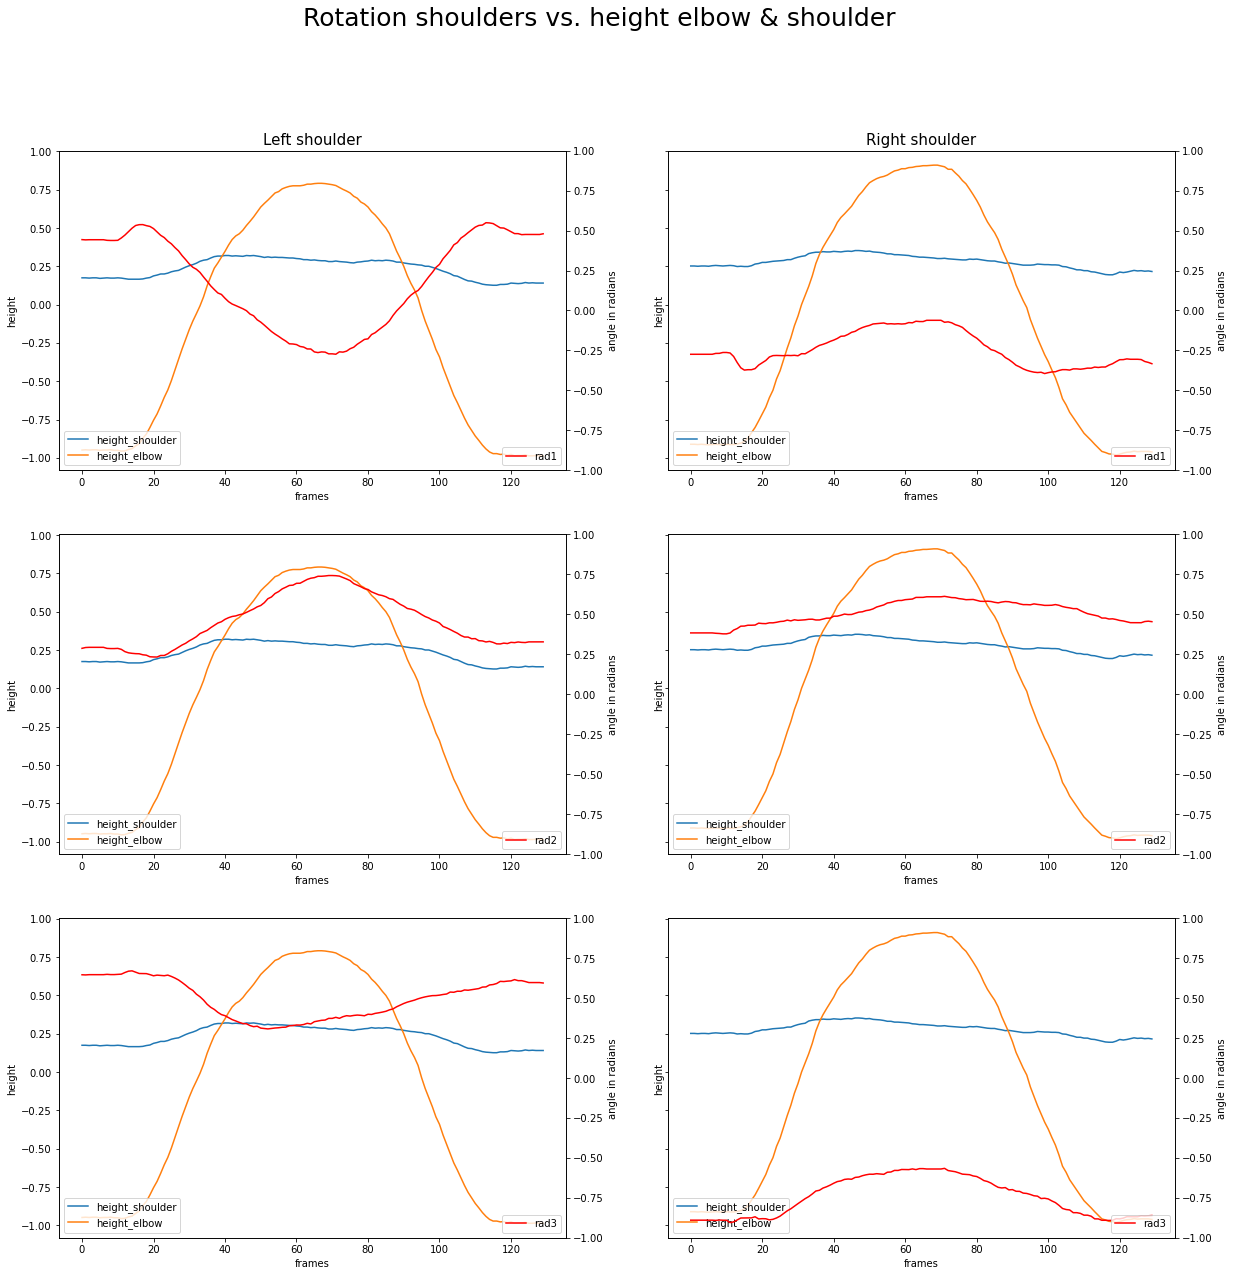

In [5]:
plot_angles_shoulder_elbow_height(df)

In [6]:
dict_euler_dfs = {}
for c in categories:
    file = os.path.join(directory, c)
    files_category = FilesCategory(file)
    patient_ids = sorted(files_category.get_patient_ids())
    exercises = get_exercises_from_patients(patient_ids, exercise_type)
    dfs_dict = get_dfs_dict_rotation(files_category, exercises)
    for df in dfs_dict.values():
        dict_euler_dfs[c] = get_df_with_euler(df, rotation)
        
dict_euler_dfs

{'Category_1':              x         y         z sensor  frame    x0    x1    x2    y0  \
 0    -1.000580 -0.756705 -2.308138      2      0  0.83  0.55 -0.06 -0.56   
 1     0.000000  0.000000  0.000000      3      0 -0.68  0.07 -0.73 -0.09   
 2    -0.482249  1.069184 -0.991519      5      0 -0.22 -0.31 -0.93  0.37   
 3    -0.326920  0.769406  0.139068      4      0  0.55  0.77  0.32 -0.82   
 4    -0.279957  1.531532 -1.797048      6      0  0.32  0.55  0.77 -0.31   
 ...        ...       ...       ...    ...    ...   ...   ...   ...   ...   
 1395 -0.305238  1.031242 -0.980679      5    174 -0.35 -0.21 -0.91  0.38   
 1396 -0.440707 -1.049323 -1.007780      8    174 -0.30  0.17 -0.94 -0.46   
 1397  0.050563  1.385223 -1.795228      6    174  0.48  0.36  0.80 -0.51   
 1398 -0.402764 -0.720623  0.162530      7    174  0.61 -0.75  0.26  0.78   
 1399  0.057763 -1.305778 -1.862052      9    174  0.53 -0.22  0.82  0.62   
 
         y1    y2    z0    z1    z2      angle1     angle2  

In [7]:
keys = list(dict_euler_dfs.keys())
keys

['Category_1', 'Category_3']

KeyError: 'sensor'

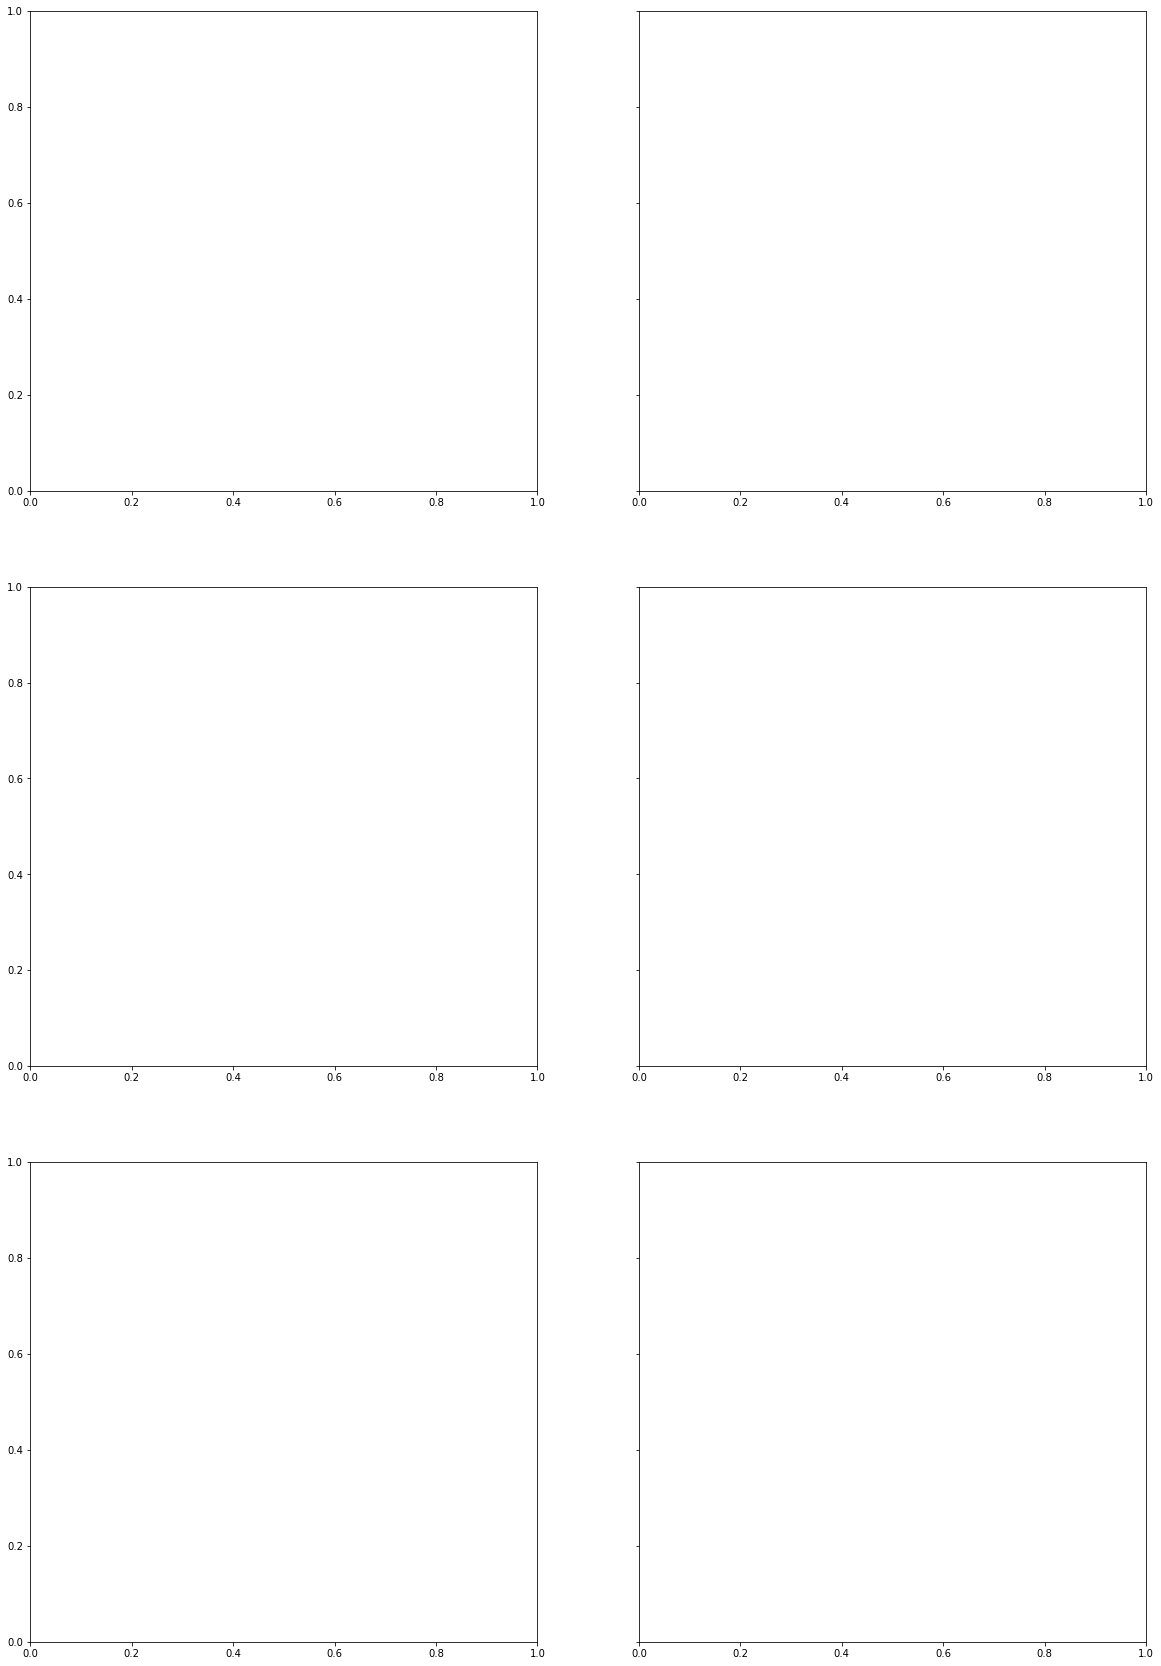

In [8]:
fig, axs = plt.subplots(3, 2, sharey=True, figsize=(20,30))

keys = list(dict_euler_dfs.keys())
for p, df in dict_euler_dfs[keys[0]].items():
    axs[0,0].plot(df[df['sensor']=='4']['frame'], df[df['sensor']=='4']['angle1'], label=('Z1_'+ str(p)))    
    axs[1,0].plot(df[df['sensor']=='4']['frame'], df[df['sensor']=='4']['angle2'], label=('X_' + str(p)))
    axs[2,0].plot(df[df['sensor']=='4']['frame'], df[df['sensor']=='4']['angle3'], label=('Z2_'+ str(p)))
    
    
for p, df in dict_euler_dfs[keys[1]].items():
    axs[0,1].plot(df[df['sensor']=='4']['frame'], df[df['sensor']=='4']['angle1'], label=('Z1_'+ str(p))) 
    axs[1,1].plot(df[df['sensor']=='4']['frame'], df[df['sensor']=='4']['angle2'], label=('X_' + str(p)))
    axs[2,1].plot(df[df['sensor']=='4']['frame'], df[df['sensor']=='4']['angle3'], label=('Z2_'+ str(p)))

if rotation[0] == rotation[2]:
    axs[0,0].set_title(rotation[0] + '1 ', fontsize=20)
    axs[1,0].set_title(rotation[1], fontsize=20)
    axs[2,0].set_title(rotation[2] + '2 ', fontsize=20)
    axs[0,1].set_title(rotation[0] + '1 ', fontsize=20)
    axs[1,1].set_title(rotation[1], fontsize=20)
    axs[2,1].set_title(rotation[2] + '2 ', fontsize=20)
else:
    axs[0,0].set_title(rotation[0], fontsize=20)
    axs[1,0].set_title(rotation[1], fontsize=20)
    axs[2,0].set_title(rotation[2], fontsize=20)
    axs[0,1].set_title(rotation[0], fontsize=20)
    axs[1,1].set_title(rotation[1], fontsize=20)
    axs[2,1].set_title(rotation[2], fontsize=20)
#ax2.get_shared_y_axes().join(ax2, ax4)

if (len(categories)==2) & (len(sensors)==1):
    fig.suptitle(rotation + ' rotation angles for sensor ' + sensors[0] + ' between ' + categories[0] + ' and ' + categories[1], fontsize=25)
elif (len(categories)==1) & (len(sensors)==2):
    fig.suptitle(rotation + ' rotation angles for sensors ' + sensors[0] + ' and ' + sensors[1] + ' for ' + categories[0], fontsize=25)
for ax in axs.flat:
    ax.set(xlabel='frame', ylabel='angle in degrees')

for row in axs:
    for ax in row:
        ax.grid()
        ax.legend(loc=4)
